<a href="https://colab.research.google.com/github/xingchenzhao/study_deep_learning/blob/master/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install d2lzh  # installing d2l
!pip install -U --pre mxnet-cu101mkl  # updating mxnet to at least v1.6

In [0]:
import d2lzh as d2l
from mxnet import gluon, init, nd
from mxnet.gluon import data as gdata, nn
import os
import sys

**Let's build a *AlexNet***

In [0]:
net = nn.Sequential()
net.add(nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Dense(4096, activation='relu'), nn.Dropout(0.7),
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
        nn.Dense(10))

Build a 224*224 with 1 channel data to see the shape of each layer

In [0]:
X = nd.random.uniform(shape=(1,1,224,224))
net.initialize()
for layer in net:
  X = layer(X)
  print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 96, 54, 54)
pool0 output shape:	 (1, 96, 26, 26)
conv1 output shape:	 (1, 256, 26, 26)
pool1 output shape:	 (1, 256, 12, 12)
conv2 output shape:	 (1, 384, 12, 12)
conv3 output shape:	 (1, 384, 12, 12)
conv4 output shape:	 (1, 256, 12, 12)
pool2 output shape:	 (1, 256, 5, 5)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


Loading Data

In [0]:
def load_data_fashion_mnist(batch_size, resize=None, root=os.path.join(
    '~','.mxnet', 'datasets', 'fashion-mnist')):
    root = os.path.expanduser(root)
    transformer = []
    if resize:
      transformer += [gdata.vision.transforms.Resize(resize)]
    transformer += [gdata.vision.transforms.ToTensor()]
    transformer = gdata.vision.transforms.Compose(transformer)
    mnist_train = gdata.vision.FashionMNIST(root=root, train=True)
    mnist_test = gdata.vision.FashionMNIST(root=root, train=False)
    num_workers = 0 if sys.platform.startswith('win32') else 4
    train_iter = gdata.DataLoader(
          mnist_train.transform_first(transformer), batch_size, shuffle=True,
          num_workers=num_workers)
    test_iter = gdata.DataLoader(
          mnist_test.transform_first(transformer), batch_size, shuffle=False,
          num_workers=num_workers)
    return train_iter, test_iter

batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

Training AlexNet. We use a small learning rate due to the complexities of AlexNet

In [0]:
lr, num_epochs, ctx = 0.01, 120, d2l.try_gpu()
net.initialize(force_reinit=True, ctx=ctx, init=init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate':lr})
d2l.train_ch5(net, train_iter, test_iter, batch_size, trainer, ctx, num_epochs)

training on gpu(0)
epoch 1, loss 1.4020, train acc 0.471, test acc 0.740, time 36.0 sec
epoch 2, loss 0.6987, train acc 0.740, test acc 0.787, time 33.5 sec
epoch 3, loss 0.5733, train acc 0.784, test acc 0.827, time 33.5 sec
epoch 4, loss 0.5058, train acc 0.814, test acc 0.842, time 33.6 sec
epoch 5, loss 0.4572, train acc 0.833, test acc 0.861, time 33.6 sec
epoch 6, loss 0.4239, train acc 0.844, test acc 0.871, time 33.4 sec
epoch 7, loss 0.4008, train acc 0.854, test acc 0.876, time 33.6 sec
epoch 8, loss 0.3805, train acc 0.860, test acc 0.876, time 33.6 sec
epoch 9, loss 0.3652, train acc 0.867, test acc 0.880, time 33.7 sec
epoch 10, loss 0.3530, train acc 0.872, test acc 0.888, time 33.7 sec
epoch 11, loss 0.3383, train acc 0.876, test acc 0.890, time 33.7 sec
epoch 12, loss 0.3321, train acc 0.878, test acc 0.892, time 33.7 sec
epoch 13, loss 0.3195, train acc 0.882, test acc 0.891, time 33.5 sec
epoch 14, loss 0.3142, train acc 0.886, test acc 0.897, time 33.7 sec
epoch 15, 

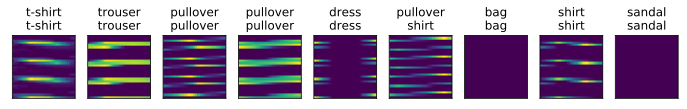

In [0]:
for X, y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X.as_in_context(ctx)).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])